In [7]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%config IPCompleter.greedy=True
%matplotlib inline

In [8]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

train_set = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=100, shuffle=True)

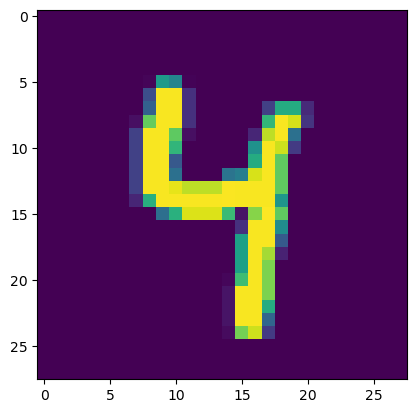

In [9]:
for data in train_set:
    plt.imshow(data[0][0].view(28,28))
    break

In [10]:
class NNet(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super().__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, out_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

    def train(self, data, epochs, lr=1e-3):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        losses = []

        for epoch in range(epochs):
            for d in data:
                X, y = d
                self.zero_grad()
                output = self.forward(X.view(-1, self.input_size))
                loss = F.nll_loss(output, y)
                loss.backward()
                optimizer.step()
            losses.append(float(loss))
        return losses

    def predict(self, data):
        return int(torch.argmax(self.forward(data)))

In [11]:
input_size = 28*28
hidden_size = 64
output_size = 10

net = NNet(input_size, hidden_size, output_size)
print(net.train(train_set, epochs=5))

[0.3314233124256134, 0.34896981716156006, 0.08029569685459137, 0.06534100323915482, 0.07742291688919067]


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_set:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print('Accuracy: ', str(round((correct/total) * 100, 3)) + '%')

Accuracy:  96.66%


Predicted value: 3


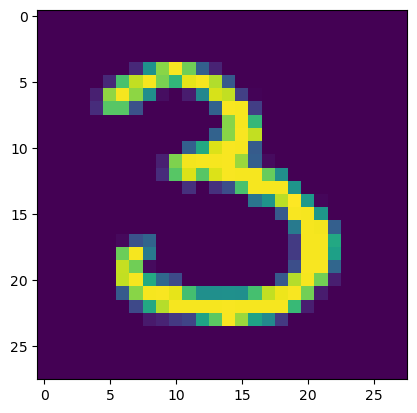

In [16]:
number = X[1]
data_to_predict = number.view(1, 28*28)
predicted_val = net.predict(data_to_predict)
plt.imshow(data_to_predict.view(28,28))
print('Predicted value: ' + str(predicted_val))